# Benchmark de différent classifier 

## SVM classifier

Dans un premier temps, on va se servir d'un svm classifier et tester les performances

In [4]:
!pip install --no-cache-dir -r requirement.txt


[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from skimage.feature import hog
import cv2  
import os
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve,GridSearchCV,learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import skimage.io as io
from skimage.transform import resize
from tqdm import tqdm
import numpy as np
import matplotlib as mp

IMG_PATH = "../DATA"
Data = pd.DataFrame()
UPLOAD_PATH = "Upload"
folders = os.listdir(IMG_PATH)


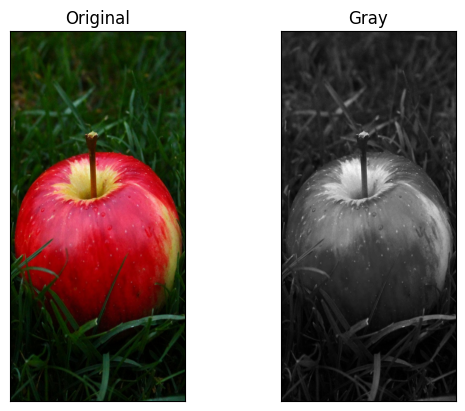

In [32]:
img_original = cv2.imread("../Data/apple/Image_61.jpg")
img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
plt.subplot(121),plt.imshow(img_rgb, cmap = plt.cm.Spectral),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray, cmap = "gray"),plt.title('Gray')
plt.xticks([]), plt.yticks([])
plt.show()

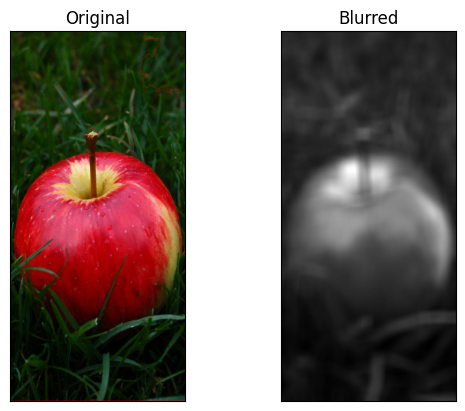

In [22]:
blur = cv2.blur(gray,(50,50))

plt.subplot(121),plt.imshow(img_rgb, cmap = plt.cm.Spectral),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur,cmap = "gray"),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

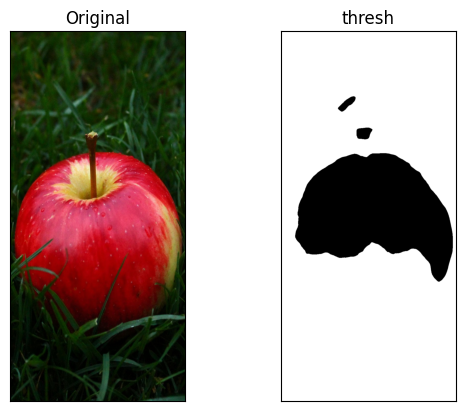

In [33]:

ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_TRIANGLE )
plt.subplot(121),plt.imshow(img_rgb, cmap = plt.cm.Spectral),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, cmap = 'gray'),plt.title('thresh')
plt.xticks([]), plt.yticks([])
plt.show()


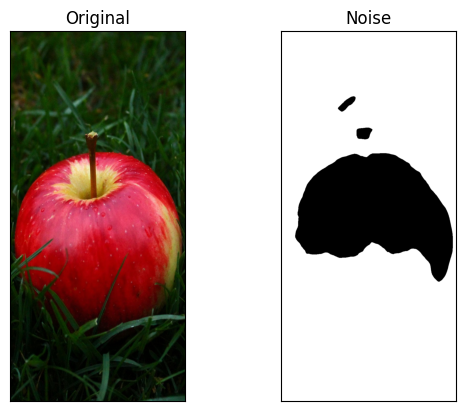

In [34]:


# Noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.subplot(121),plt.imshow(img_rgb, cmap = plt.cm.Spectral),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening, cmap = 'gray'),plt.title('Noise')
plt.xticks([]), plt.yticks([])
plt.show()

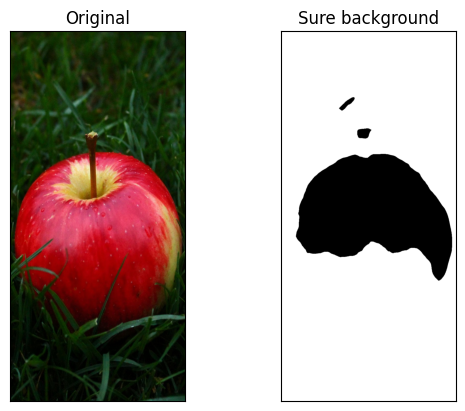

In [35]:

# Sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.subplot(121),plt.imshow(img_rgb, cmap = plt.cm.Spectral),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_bg, cmap = 'gray'),plt.title('Sure background')
plt.xticks([]), plt.yticks([])
plt.show()


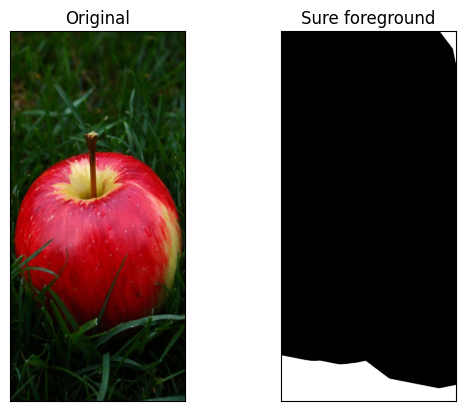

In [36]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.subplot(121),plt.imshow(img_rgb, cmap = plt.cm.Spectral),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_fg,cmap = 'gray'),plt.title('Sure foreground')
plt.xticks([]), plt.yticks([])
plt.show()


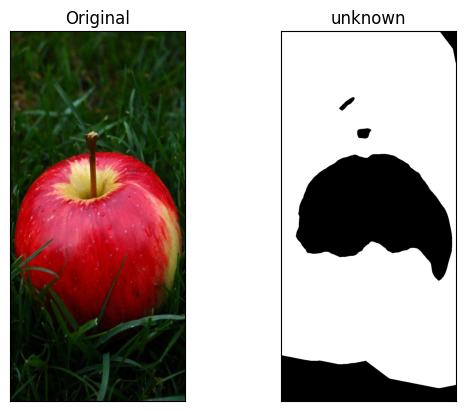

In [37]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.subplot(121),plt.imshow(img_rgb, cmap = plt.cm.Spectral),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(unknown,cmap = 'gray'),plt.title('unknown')
plt.xticks([]), plt.yticks([])
plt.show()


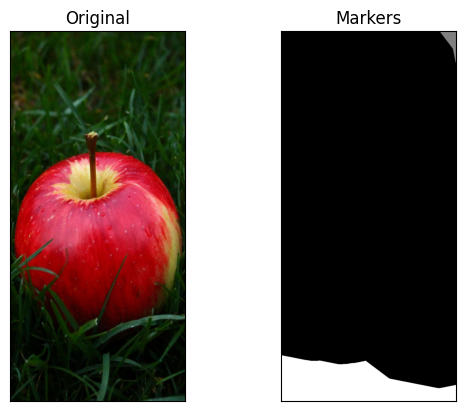

In [38]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

plt.subplot(121),plt.imshow(img_rgb, cmap = plt.cm.Spectral),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(markers, cmap = 'gray'),plt.title('Markers')
plt.xticks([]), plt.yticks([])
plt.show()

In [39]:
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1



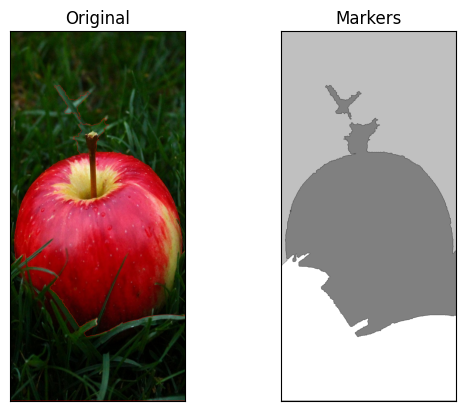

In [40]:
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img_rgb,markers)
img = img_rgb[markers == -1] = [255,0,0]

plt.subplot(121),plt.imshow(img_rgb, cmap = plt.cm.Spectral),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(markers, cmap = 'gray'),plt.title('Markers')
plt.xticks([]), plt.yticks([])
plt.show()